In [2]:
# -*- coding: utf 8

from matplotlib import pyplot as plt
from scipy import stats as ss

import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('EduBas_Munic.csv')
df

,CodMun,CodMeso,MesoRegiao,NomeMun,UF,PopEst,Barco,Metro,Mototx,Taxi,...,TxAprv_1,TxAprv_2,TxAprv_3,TxAprv_4,TxAprv_5,IndRend_P,Mat,Port,NtMedPadr_N,IDEB_NxP
0,3100104,3105,Triângulo Mineiro / Alto Paranaíba,Abadia dos Dourados,MG,7059,Não,Não,Não,Sim,...,100.0,100.0,85.3,100.0,98.9,0.96,244.18,231.60,6.83,6.6
1,3100104,3105,Triângulo Mineiro / Alto Paranaíba,Abadia dos Dourados,MG,7059,Não,Não,Não,Sim,...,100.0,100.0,85.3,100.0,98.9,0.96,244.18,231.60,6.83,6.6
2,3100203,3106,Central Mineira,Abaeté,MG,23611,Não,Não,Não,Sim,...,100.0,100.0,99.3,100.0,100.0,1.00,255.01,241.87,7.23,7.2
3,3100203,3106,Central Mineira,Abaeté,MG,23611,Não,Não,Não,Sim,...,98.3,100.0,100.0,99.1,97.9,0.99,238.57,232.04,6.74,6.7
4,3100203,3106,Central Mineira,Abaeté,MG,23611,Não,Não,Não,Sim,...,99.0,100.0,99.6,99.6,99.3,0.99,249.64,238.66,7.07,7.0
5,3100302,3112,Zona da Mata,Abre Campo,MG,13733,Não,Não,Não,Não,...,100.0,100.0,100.0,100.0,100.0,1.00,246.48,236.46,6.97,7.0
6,3100302,3112,Zona da Mata,Abre Campo,MG,13733,Não,Não,Não,Não,...,-,-,-,-,-,-,-,-,-,-
7,3100302,3112,Zona da Mata,Abre Campo,MG,13733,Não,Não,Não,Não,...,97.7,96.2,97.3,97.4,99.5,0.98,246.48,236.46,6.97,6.8
8,3100401,3112,Zona da Mata,Acaiaca,MG,4065,Não,Não,Não,Sim,...,100.0,100.0,100.0,100.0,100.0,1.00,231.57,222.84,6.43,6.4
9,3100401,3112,Zona da Mata,Acaiaca,MG,4065,Não,Não,Não,Sim,...,100.0,100.0,100.0,100.0,100.0,1.00,231.57,222.84,6.43,6.4


In [5]:
df.columns

Index(['CodMun', 'CodMeso', 'MesoRegiao', 'NomeMun', 'UF', 'PopEst', 'Barco',
       'Metro', 'Mototx', 'Taxi', 'Trem', 'Van', 'Aviao', 'ImpacAmb_24meses',
       'Secas_Enxurr', 'PoluiAr', 'Polui_corpoAgua', 'Assorea_corpoAgua',
       'DiminVazao_corpoAgua', 'Desmatam', 'Queimad', 'Erosao_Desert',
       'Dimin_FaunaFlora', 'MoradRiscoAmb', 'FaltaSaneamen', 'Favela',
       'Cortico', 'LoteIrr', 'Ocupacao', 'AtingidoPorSeca_4a',
       'AtingPorAlagam_4a', 'AtingPorErosao_4a', 'AtingPorEnchen_4a',
       'AtingPorEnxurr_4a', 'AtingPorDeslizam_4a', 'Rede', 'TxAprv_1-5 ',
       'TxAprv_1', 'TxAprv_2', 'TxAprv_3', 'TxAprv_4', 'TxAprv_5', 'IndRend_P',
       'Mat', 'Port', 'NtMedPadr_N', 'IDEB_NxP'],
      dtype='object')

In [6]:
df = df[df.Rede != 'Pública'] #Pois é uma junção entre as outras (Municipal, Estadual e Federal)
#df['Rede']

In [7]:
df = df[df.IDEB_NxP != '-']
#df['IDEB_NxP']

## Var para os municípios
- Muito pequenos = MP: Até 5k
- Pequenos = P: 5001 até 20k
- Grandes = G: A partir de 100.001

In [8]:
dfMP = df[df['PopEst'] <= 5000]
dfP = df[(df['PopEst'] > 5000) & (df['PopEst'] <= 20000)]
dfG = df[df['PopEst'] > 100000]


In [9]:
Notas = []
Notas = ['IDEB_NxP', 'Mat', 'Port']

In [10]:
Notas_MP = []
Notas_P = []
Notas_G = []

Notas_Min = np.zeros(3)
Notas_Max = np.zeros(3)
Notas_Mean = np.zeros(3)
Notas_Median = np.zeros(3)

#Notas_MP = [Notas_Min, Notas_Max, Notas_Mean, Notas_Median]
#Notas_P = [Notas_Min, Notas_Max, Notas_Mean, Notas_Median]
#Notas_G = [Notas_Min, Notas_Max, Notas_Mean, Notas_Median]
#print(Notas_MP)

In [11]:
##Sobre Municípios muito pequenos
i = 0

while (i < 3):
    Notas_Min[i] = dfMP[Notas[i]].apply(lambda x, axis:float(x), axis=1).min()
    Notas_Max[i] = dfMP[Notas[i]].apply(lambda x, axis:float(x), axis=1).max()
    Notas_Mean[i] = dfMP[Notas[i]].apply(lambda x, axis:float(x), axis=1).mean()
    Notas_Median[i] = dfMP[Notas[i]].apply(lambda x, axis:float(x), axis=1).median()
    i = i+1
    
Notas_MP = [Notas_Min, Notas_Max, Notas_Mean, Notas_Median]
#print(Notas_MP)

In [12]:
dic_Notas_MP = {'MinMP': Notas_MP[0], 'MaxMP': Notas_MP[1], 'MeanMP': Notas_MP[2], 'MedianMP': Notas_MP[3]}
df_NotasMP = pd.DataFrame(data=dic_Notas_MP)
df_NotasMP.index = [Notas]
#df_NotasMP

In [13]:
##Sobre Municípios pequenos
i = 0

while (i < 3):
    Notas_Min[i] = dfP[Notas[i]].apply(lambda x, axis:float(x), axis=1).min()
    Notas_Max[i] = dfP[Notas[i]].apply(lambda x, axis:float(x), axis=1).max()
    Notas_Mean[i] = dfP[Notas[i]].apply(lambda x, axis:float(x), axis=1).mean()
    Notas_Median[i] = dfP[Notas[i]].apply(lambda x, axis:float(x), axis=1).median()
    i = i+1
Notas_P = [Notas_Min, Notas_Max, Notas_Mean, Notas_Median]    
#print(Notas_P)

In [14]:
dic_Notas_P = {'MinP': Notas_P[0], 'MaxP': Notas_P[1], 'MeanP': Notas_P[2], 'MedianP': Notas_P[3]}
df_NotasP = pd.DataFrame(data=dic_Notas_P)
df_NotasP.index = [Notas]
#df_NotasP

In [15]:
##Sobre Municípios grandes
i = 0

while (i < 3):
    Notas_Min[i] = dfG[Notas[i]].apply(lambda x, axis:float(x), axis=1).min()
    Notas_Max[i] = dfG[Notas[i]].apply(lambda x, axis:float(x), axis=1).max()
    Notas_Mean[i] = dfG[Notas[i]].apply(lambda x, axis:float(x), axis=1).mean()
    Notas_Median[i] = dfG[Notas[i]].apply(lambda x, axis:float(x), axis=1).median()
    i = i+1
Notas_G = [Notas_Min, Notas_Max, Notas_Mean, Notas_Median]    
#print(Notas_G)

In [16]:
dic_Notas_G = {'MinG': Notas_G[0], 'MaxG': Notas_G[1], 'MeanG': Notas_G[2], 'MedianG': Notas_G[3]}
df_NotasG = pd.DataFrame(data=dic_Notas_G)
df_NotasG.index = [Notas]
#df_NotasG

In [17]:
df_Notas = df_NotasMP.set_index(df_NotasMP.index).join(df_NotasP.set_index(df_NotasP.index)).join(df_NotasG.set_index(df_NotasG.index))
df_Notas

,MinMP,MaxMP,MeanMP,MedianMP,MinP,MaxP,MeanP,MedianP,MinG,MaxG,MeanG,MedianG
IDEB_NxP,3.70,8.00,6.248879,6.20,3.40,8.50,6.244243,6.25,5.20,7.70,6.438806,6.50
Mat,192.53,291.45,232.487399,230.84,179.36,296.25,230.138602,230.38,203.58,282.04,234.715075,233.91
Port,180.18,269.35,221.634350,220.88,159.23,265.91,219.674079,220.56,199.99,260.10,227.695522,227.83


# PDF ideb para dfMP, dfP e dfG
A função densidade (PDF) pode ser compreendia
como uma extensão natural do histograma.

In [45]:
#Plotar gráficos e ir salvando

/home/martimallow/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Text(0.5, 0.98, 'Municipios Grandes')

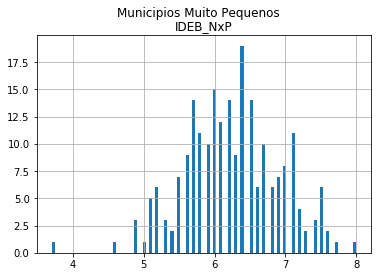

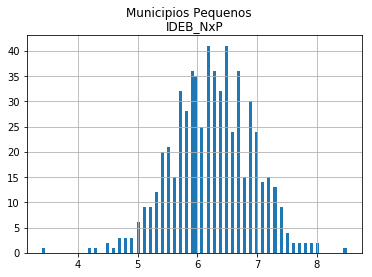

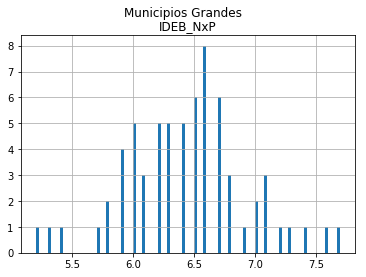

In [18]:
dfMP.loc[:,'IDEB_NxP'] = dfMP['IDEB_NxP'].astype(np.float)
dfP.loc[:,'IDEB_NxP'] = dfP['IDEB_NxP'].astype(np.float)
dfG.loc[:,'IDEB_NxP'] = dfG['IDEB_NxP'].astype(np.float)

dfMP.hist(column='IDEB_NxP', bins=100)
plt.suptitle("Municipios Muito Pequenos")

dfP.hist(column='IDEB_NxP', bins=100)
plt.suptitle("Municipios Pequenos")

dfG.hist(column='IDEB_NxP', bins=100)
plt.suptitle("Municipios Grandes")

# CDF ideb para dfMP, dfP e dfG

Text(0.5, 0.98, 'Municipios Grandes')

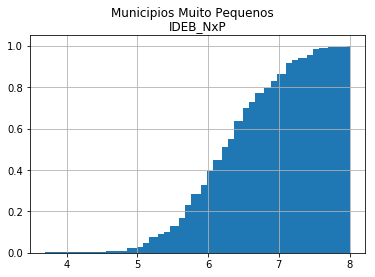

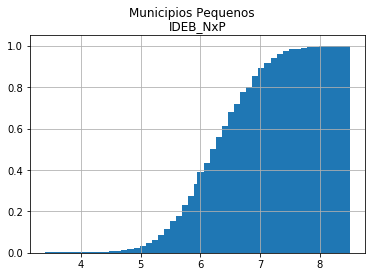

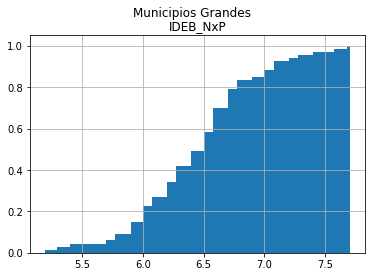

In [20]:
dfMP.loc[:,'IDEB_NxP'] = dfMP['IDEB_NxP'].astype(np.float)
dfP.loc[:,'IDEB_NxP'] = dfP['IDEB_NxP'].astype(np.float)
dfG.loc[:,'IDEB_NxP'] = dfG['IDEB_NxP'].astype(np.float)

dfMP.hist(column='IDEB_NxP', bins=100, cumulative=True, density=True)
#dfMP.hist(column='IDEB_NxP', bins=100, cumulative=True, histtype='step')
plt.suptitle("Municipios Muito Pequenos")

dfP.hist(column='IDEB_NxP', bins=100, cumulative=True, density=True)
plt.suptitle("Municipios Pequenos")

dfG.hist(column='IDEB_NxP', bins=100, cumulative=True, density=True)
plt.suptitle("Municipios Grandes")

# Testes de hipóteses

In [48]:
# Ver sobre Teste de Kolmogorov
# https://pt.wikipedia.org/wiki/Teste_Kolmogorov-Smirnov
# http://www.portalaction.com.br/inferencia/62-teste-de-kolmogorov-smirnov

# Estatísticas considerando as 12 Meso regiões
Triângulo Mineiro / Alto Paranaíba, Central Mineira, Zona da Mata, Oeste de Minas, Vale do Rio Doce, Sul / Sudoeste de Minas, Campo das Vertentes, Jequitinhonha, Metropolitana de Belo Horizonte, Noroeste de Minas, Vale do Mucuri, Norte de Minas


In [22]:
#dfMesoregioes = df['MesoRegiao'].drop_duplicates(keep = 'first', inplace = True)
#df['MesoRegiao']
#dfMesoregioes

df[Notas[0]] = df[Notas[0]].astype(float)
df[Notas[1]] = df[Notas[1]].astype(float)
df[Notas[2]] = df[Notas[2]].astype(float)

In [24]:
mesoReg = ['Triângulo Mineiro / Alto Paranaíba', 'Central Mineira', 'Zona da Mata', 'Oeste de Minas', 'Vale do Rio Doce', 'Sul / Sudoeste de Minas', 'Campo das Vertentes', 'Jequitinhonha', 'Metropolitana de Belo Horizonte', 'Noroeste de Minas', 'Vale do Mucuri', 'Norte de Minas']
#mesoReg

In [25]:
#dfVetMeso = np.zeros(12)
#idx = 0

#for idx, m in enumerate(mesoReg):
    #dfVetMeso[idx] = df[df['MesoRegiao'] == m]
    #print (idx, m)

#dfVetMeso

In [26]:
dfMeso1 = df[df['MesoRegiao'] == 'Triângulo Mineiro / Alto Paranaíba']
dfMeso2 = df[df['MesoRegiao'] == 'Central Mineira']
dfMeso3 = df[df['MesoRegiao'] == 'Zona da Mata']
dfMeso4 = df[df['MesoRegiao'] == 'Oeste de Minas']
dfMeso5 = df[df['MesoRegiao'] == 'Vale do Rio Doce']
dfMeso6 = df[df['MesoRegiao'] == 'Sul / Sudoeste de Minas']
dfMeso7 = df[df['MesoRegiao'] == 'Campo das Vertentes']
dfMeso8 = df[df['MesoRegiao'] == 'Jequitinhonha']
dfMeso9 = df[df['MesoRegiao'] == 'Metropolitana de Belo Horizonte']
dfMeso10 = df[df['MesoRegiao'] == 'Noroeste de Minas']
dfMeso11 = df[df['MesoRegiao'] == 'Vale do Mucuri']
dfMeso12 = df[df['MesoRegiao'] == 'Norte de Minas']

In [27]:
meso = df.groupby('MesoRegiao')[["Mat", "Port", "IDEB_NxP"]]
meso_mean = meso.mean()
meso_mean

,Mat,Port,IDEB_NxP
MesoRegiao,,,
Campo das Vertentes,239.903333,227.365111,6.540000
Central Mineira,239.518049,228.924634,6.631707
Jequitinhonha,222.015205,212.255068,5.991781
Metropolitana de Belo Horizonte,232.840329,224.069605,6.350000
Noroeste de Minas,230.120000,219.802000,6.330000
Norte de Minas,217.773008,209.374962,5.878195
Oeste de Minas,244.064561,233.901930,6.819298
Sul / Sudoeste de Minas,242.601869,231.604798,6.656061
Triângulo Mineiro / Alto Paranaíba,231.965368,224.096947,6.330526


In [58]:
#meso.min() 

In [59]:
#meso.max()

In [65]:
#meso_median = meso.median() 
#meso_median

# PDF considerando as Meso regiões

In [56]:
#Plotar gráficos e ir salvando

Text(0.5, 0.98, 'Norte de Minas')

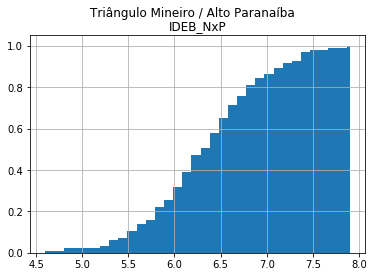

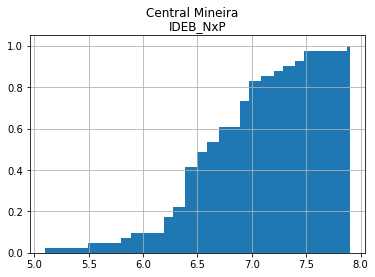

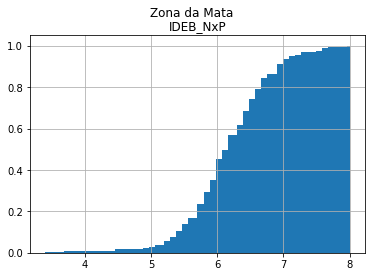

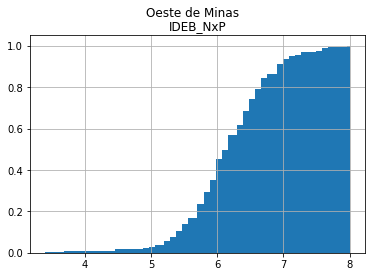

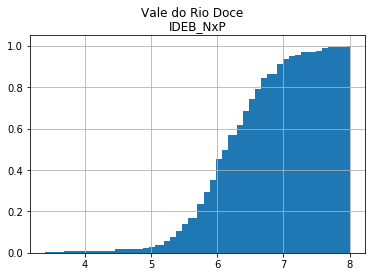

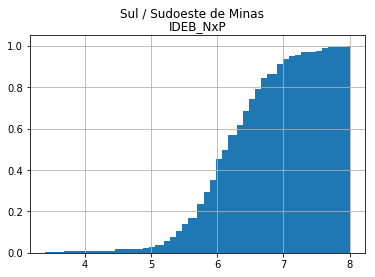

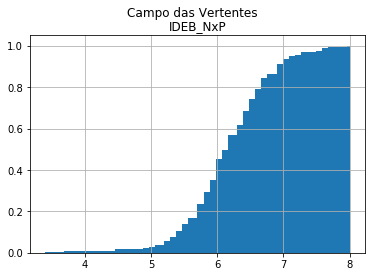

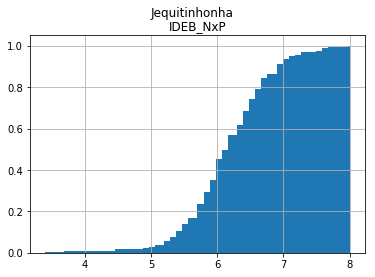

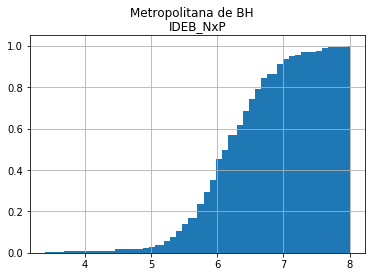

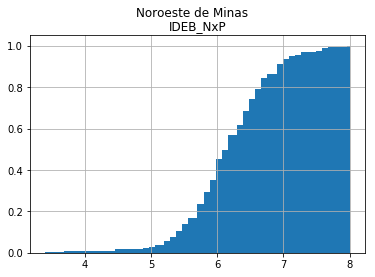

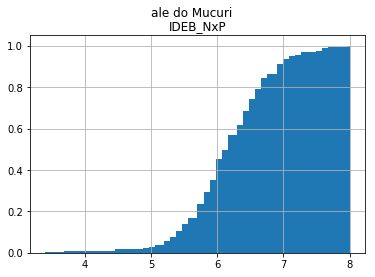

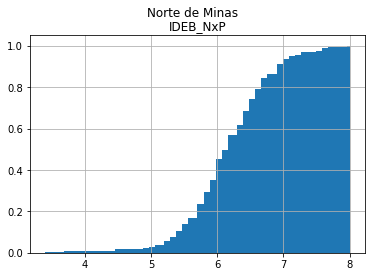

In [31]:
dfMeso1.hist(column='IDEB_NxP', bins=100, cumulative=True, density=True)
#dfEstadual.hist(column='IDEB_NxP', bins=100, cumulative=True, histtype='step')
plt.suptitle("Triângulo Mineiro / Alto Paranaíba")

dfMeso2.hist(column='IDEB_NxP', bins=100, cumulative=True, density=True)
plt.suptitle("Central Mineira")

dfMeso3.hist(column='IDEB_NxP', bins=100, cumulative=True, density=True)
plt.suptitle("Zona da Mata")

dfMeso3.hist(column='IDEB_NxP', bins=100, cumulative=True, density=True)
plt.suptitle("Oeste de Minas")

dfMeso3.hist(column='IDEB_NxP', bins=100, cumulative=True, density=True)
plt.suptitle("Vale do Rio Doce")

dfMeso3.hist(column='IDEB_NxP', bins=100, cumulative=True, density=True)
plt.suptitle("Sul / Sudoeste de Minas")

dfMeso3.hist(column='IDEB_NxP', bins=100, cumulative=True, density=True)
plt.suptitle("Campo das Vertentes")

dfMeso3.hist(column='IDEB_NxP', bins=100, cumulative=True, density=True)
plt.suptitle("Jequitinhonha")

dfMeso3.hist(column='IDEB_NxP', bins=100, cumulative=True, density=True)
plt.suptitle("Metropolitana de BH")

dfMeso3.hist(column='IDEB_NxP', bins=100, cumulative=True, density=True)
plt.suptitle("Noroeste de Minas")

dfMeso3.hist(column='IDEB_NxP', bins=100, cumulative=True, density=True)
plt.suptitle("ale do Mucuri")

dfMeso3.hist(column='IDEB_NxP', bins=100, cumulative=True, density=True)
plt.suptitle("Norte de Minas")

# Testes de hipóteses considerando as Meso regiões

# Estatísticas considerando redes de escola
Estadual, Municipal e Federal

In [33]:
dfEstadual = df[df['Rede'] == 'Estadual'] #422
dfFederal = df[df['Rede'] == 'Federal'] #3
dfMunicipal = df[df['Rede'] == 'Municipal'] #760

redes = df.groupby('Rede')[["Mat", "Port", "IDEB_NxP"]]
redes_mean = redes.mean()
redes_mean

,Mat,Port,IDEB_NxP
Rede,,,
Estadual,230.365498,221.213199,6.349763
Federal,262.250000,250.850000,7.300000
Municipal,231.349868,221.180500,6.234605


In [84]:
#redes.min()

In [64]:
#redes.max()

In [66]:
#redes.median()

/home/martimallow/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Text(0.5, 0.98, 'Rede Municipal')

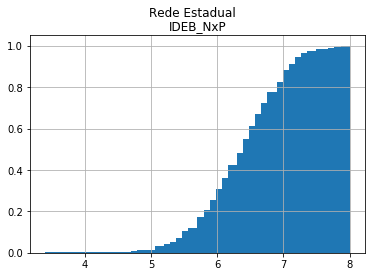

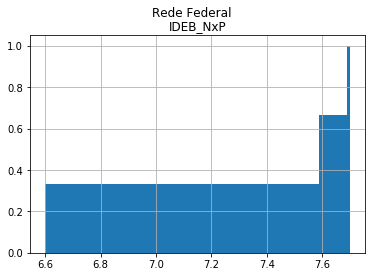

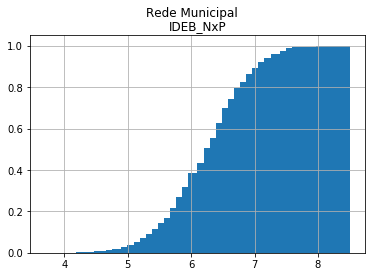

In [34]:
dfEstadual.loc[:,'IDEB_NxP'] = dfEstadual['IDEB_NxP'].astype(np.float)
dfFederal.loc[:,'IDEB_NxP'] = dfFederal['IDEB_NxP'].astype(np.float)
dfMunicipal.loc[:,'IDEB_NxP'] = dfMunicipal['IDEB_NxP'].astype(np.float)

dfEstadual.hist(column='IDEB_NxP', bins=100, cumulative=True, density=True)
#dfEstadual.hist(column='IDEB_NxP', bins=100, cumulative=True, histtype='step')
plt.suptitle("Rede Estadual")

dfFederal.hist(column='IDEB_NxP', bins=100, cumulative=True, density=True)
plt.suptitle("Rede Federal")

dfMunicipal.hist(column='IDEB_NxP', bins=100, cumulative=True, density=True)
plt.suptitle("Rede Municipal")